## T-SNE analysis btw assays and tissues
Do I see clustering between tissues or clustering within projects? If there is more clear clustering between projects this might mean I have some severe batch effects!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import mysql.connector

In [2]:
conn = mysql.connector.connect(user='root', password='password', host='127.0.0.1', port='3306',
                               database='expression_atlas_shotgun', auth_plugin='mysql_native_password')
mycursor = conn.cursor()

# check the connection
if conn.is_connected():
    print("connection succesfull")
else:
    print("no connection")


connection succesfull


We need the normal tissue predictor atlas but we need to add the original project_id

In [3]:
proteinData = pd.read_csv('/home/compomics/git/Tissue_specific/Shotgun_atlas/filtered_90_proteome_nsaf_shotgun_nofluid.csv')
proteinData.head()

,assay_id,uniprot_id,NSAF
0,27704,A5YM72,0.000420
1,27704,O00483,0.008579
2,27704,O14594,0.001052
3,27704,O15020,0.010177
4,27704,O15230,0.002257


In [4]:
tissuesql = """SELECT tissue_to_assay.assay_id, tissue.cell_type, tissue.tissue_name, tissue.disease_status
             FROM tissue_to_assay JOIN tissue ON tissue_to_assay.tissue_id = tissue.tissue_id"""
tissueData = pd.read_sql_query(tissuesql,conn)
tissueData.head()

,assay_id,cell_type,tissue_name,disease_status
0,27704,Brain,Brain,Healthy
1,27705,Brain,Brain,Healthy
2,27706,Brain,Brain,Healthy
3,27707,Brain,Brain,Healthy
4,27708,Brain,Brain,Healthy


In [5]:
tissueData.shape

(11860, 4)

In [6]:
index1 = tissueData[tissueData['tissue_name'] == 'Hela'].index
tissueData.drop(index1, inplace=True)
tissueData_healthy = tissueData.loc[tissueData['disease_status'] == "Healthy"]

In [7]:
tissueData_healthy = tissueData_healthy.drop(['cell_type', 'disease_status'], axis=1)

In [8]:
project_assay_sql = """SELECT assay.assay_id, assay.project_id FROM assay"""
project_assay_Data = pd.read_sql_query(project_assay_sql,conn)
project_assay_Data.head()

,assay_id,project_id
0,29524,1701
1,29525,1701
2,29526,1701
3,29527,1701
4,29528,1701


In [9]:
tissueData = pd.merge(tissueData, project_assay_Data, on='assay_id', how='left')
tissueData.shape

(11814, 5)

In [10]:
tissueData

,assay_id,cell_type,tissue_name,disease_status,project_id
0,27704,Brain,Brain,Healthy,1756
1,27705,Brain,Brain,Healthy,1756
2,27706,Brain,Brain,Healthy,1756
3,27707,Brain,Brain,Healthy,1756
4,27708,Brain,Brain,Healthy,1756
...,...,...,...,...,...
11809,39559,Sclera,Eye,Healthy,1917
11810,39560,Sclera,Eye,Healthy,1917
11811,39561,Sclera,Eye,Healthy,1917
11812,39562,Sclera,Eye,Healthy,1917


In [11]:
assay_atlas = pd.pivot_table(proteinData, values = 'NSAF', index = 'assay_id', columns = 'uniprot_id').fillna(0).reset_index()
assay_atlas.head(15)
#assay_atlas

uniprot_id,assay_id,A0A075B6H7,A0A075B6H8,A0A075B6H9,A0A075B6I0,A0A075B6I1,A0A075B6K4,A0A075B6Q5,A0A087WSY6,A0A0A0MRZ7,...,Q9Y6R7,Q9Y6U3,Q9Y6V0,Q9Y6W3,Q9Y6W5,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y8
0,27704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,27709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,27710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,27711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,27712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,27713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
atlas_healthy = pd.merge(assay_atlas, tissueData, on = 'assay_id')
atlas = atlas_healthy.drop(columns=['assay_id', 'cell_type', 'disease_status'])
print(atlas.shape)
#atlas

(4750, 4983)


In [13]:
atlas.head(3)

,A0A075B6H7,A0A075B6H8,A0A075B6H9,A0A075B6I0,A0A075B6I1,A0A075B6K4,A0A075B6Q5,A0A087WSY6,A0A0A0MRZ7,A0A0A0MS14,...,Q9Y6V0,Q9Y6W3,Q9Y6W5,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y8,tissue_name,project_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brain,1756
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brain,1756
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brain,1756


In [14]:
atlas.head()

,A0A075B6H7,A0A075B6H8,A0A075B6H9,A0A075B6I0,A0A075B6I1,A0A075B6K4,A0A075B6Q5,A0A087WSY6,A0A0A0MRZ7,A0A0A0MS14,...,Q9Y6V0,Q9Y6W3,Q9Y6W5,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y8,tissue_name,project_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brain,1756
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brain,1756
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brain,1756
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brain,1756
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brain,1756


In [15]:
atlas.to_csv('tsne_atlas.csv', index=False)

In [16]:
atlas = pd.read_csv('tsne_atlas.csv')

In [17]:
tissues = atlas.pop('tissue_name')
projects = atlas.pop('project_id')
values = atlas

In [18]:
tsne = TSNE(n_components=2, perplexity=60)
principalComponents = tsne.fit_transform(values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['TSNE_1', 'TSNE_2'])

In [19]:
finalDf = pd.concat([principalDf, tissues, projects], axis = 1)

In [20]:
finalDf.head()

,TSNE_1,TSNE_2,tissue_name,project_id
0,35.778339,38.219532,Brain,1756
1,31.828817,41.211651,Brain,1756
2,31.819441,41.208488,Brain,1756
3,35.784527,38.230511,Brain,1756
4,30.914995,35.742306,Brain,1756


In [21]:
palettes = ['Paired', 'Set3', 'Dark2', 'Accent', 'Pastel1', 'Pastel2', 'Spectral']
tissue_colors = []
for i in palettes:
    x = sns.color_palette(i)
    l = x.as_hex()
    for ll in l:
        tissue_colors.append(ll)
print(len(tissue_colors))

63


In [22]:
import random
palettes = ['Paired', 'Set3', 'Dark2', 'Accent', 'Pastel1', 'Pastel2', 'Spectral', 'BrBG', 'PuOr', 'RdGy', 'Blues', 'Oranges', 'Purples', 'Reds', 'YlOrBr']
project_colors = []
for i in palettes:
    x = sns.color_palette(i)
    l = x.as_hex()
    for ll in l:
        project_colors.append(ll)
for r in random.sample(project_colors, 82):
    project_colors.append(r)

print(len(project_colors))

193


In [23]:
print(len(np.unique(tissues)))
print(len(np.unique(projects)))

44
140


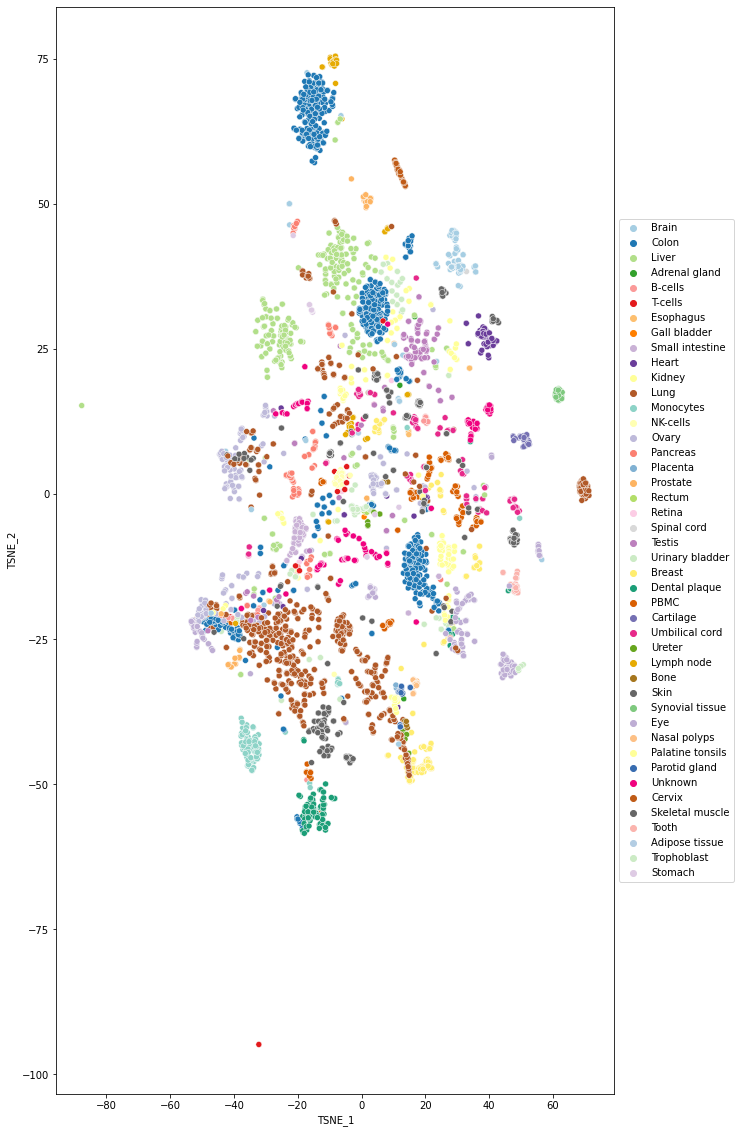

In [25]:
c = len(np.unique(finalDf['tissue_name']))
pal = sns.color_palette("Spectral", n_colors=c)
fig, ax=plt.subplots(figsize=(10,20))
g = sns.scatterplot(data=finalDf, x='TSNE_1', y='TSNE_2', hue='tissue_name', palette=tissue_colors[:44])
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.figure.savefig('TSNE_assay_tissue_2D.png')

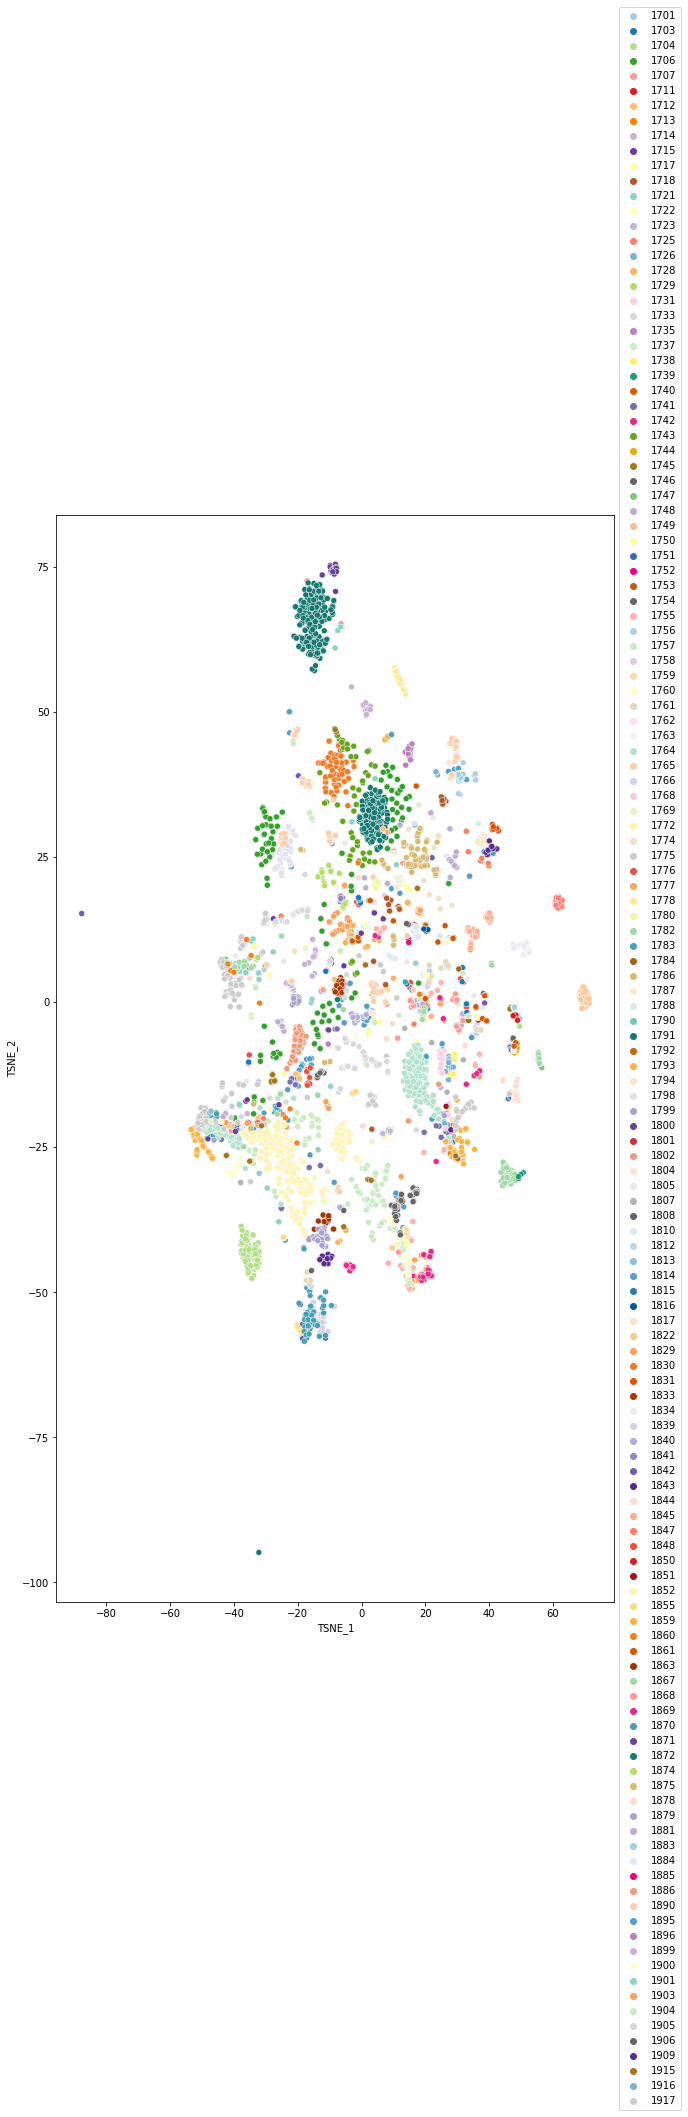

In [26]:
c = len(np.unique(finalDf['project_id']))
pal = sns.color_palette("Spectral", n_colors=c)
fig, ax=plt.subplots(figsize=(10,20))
g = sns.scatterplot(data=finalDf, x='TSNE_1', y='TSNE_2', hue='project_id', palette=project_colors[:c])
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.figure.savefig('TSNE_assay_project_2D.png')

Plot per tissue and colour per project

/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

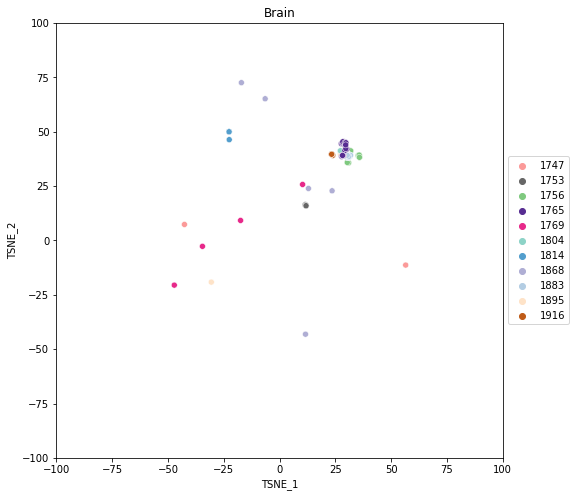

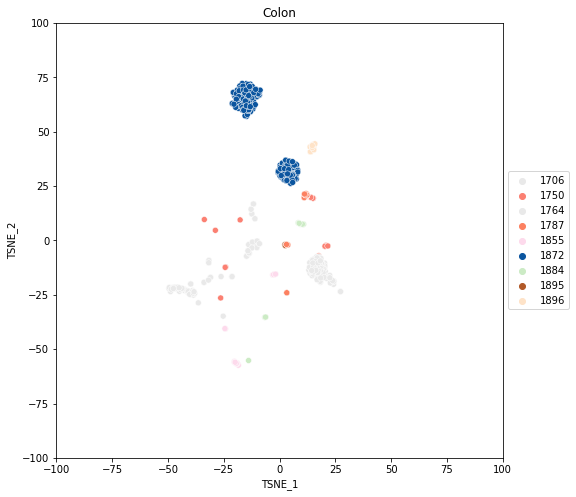

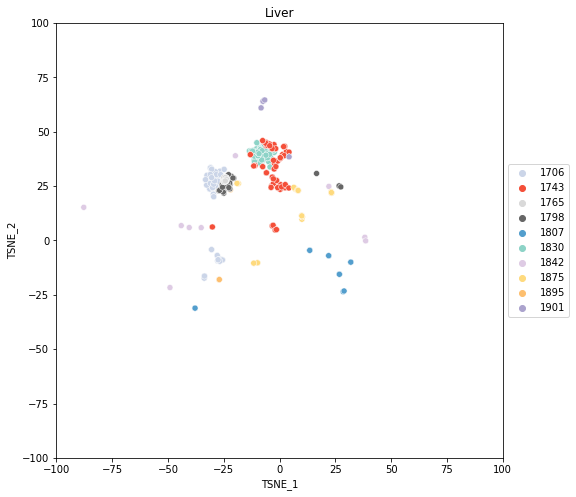

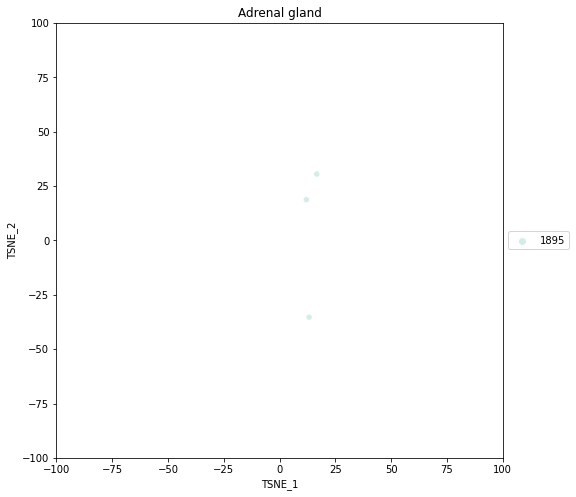

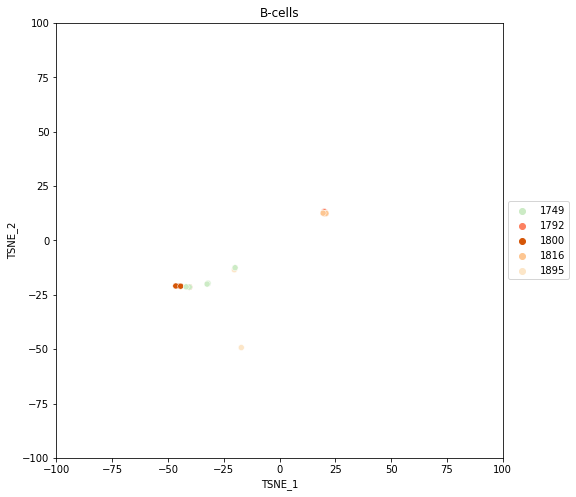

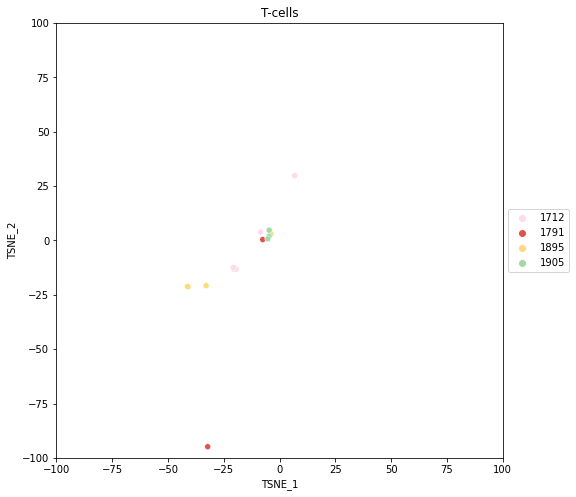

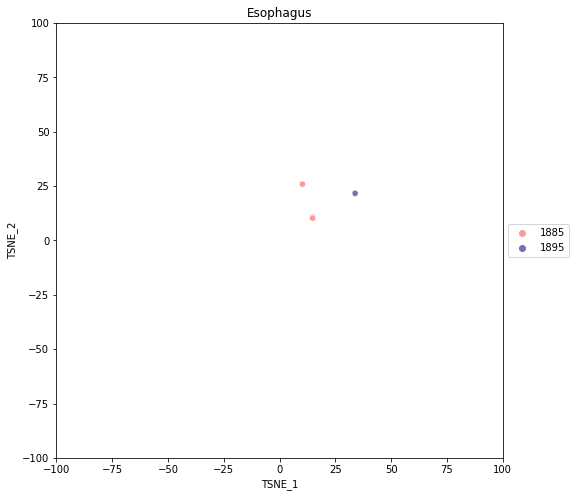

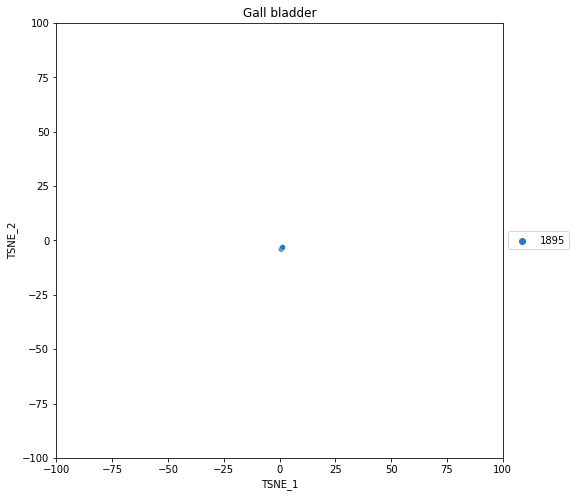

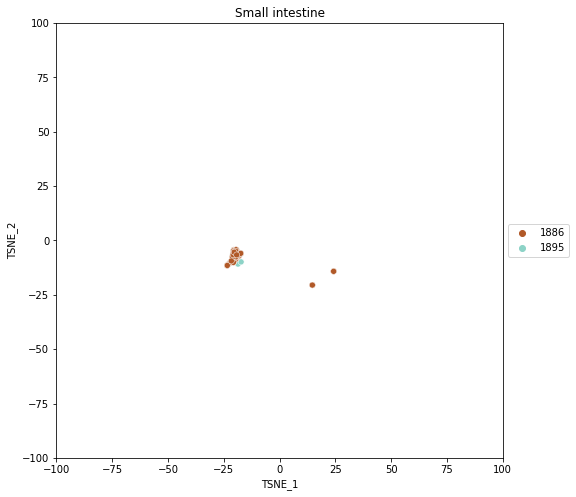

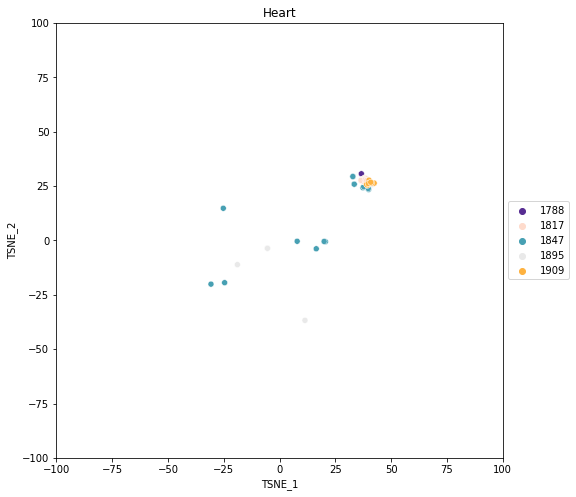

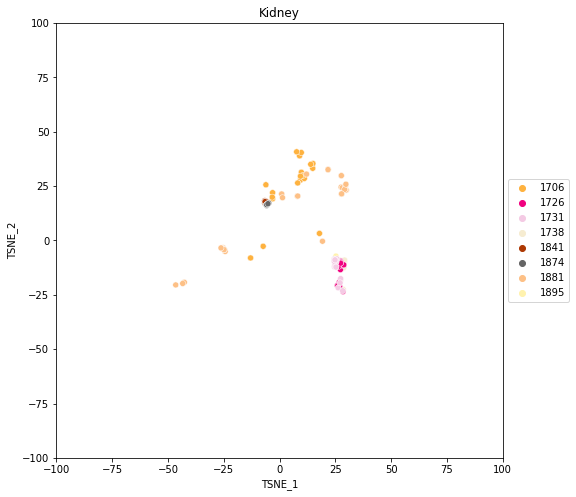

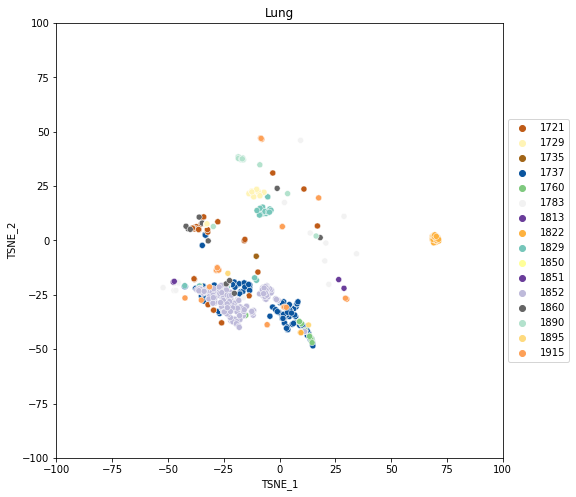

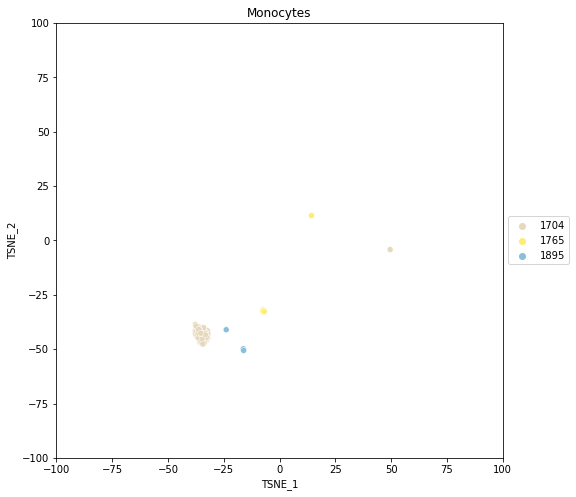

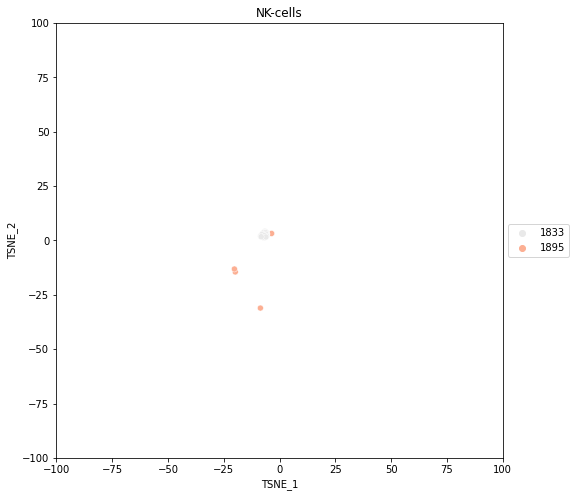

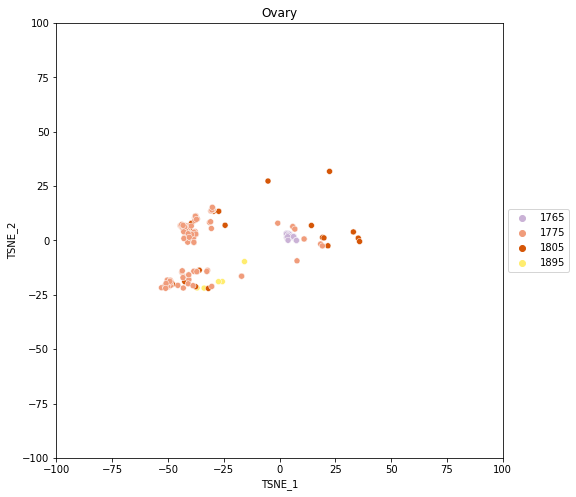

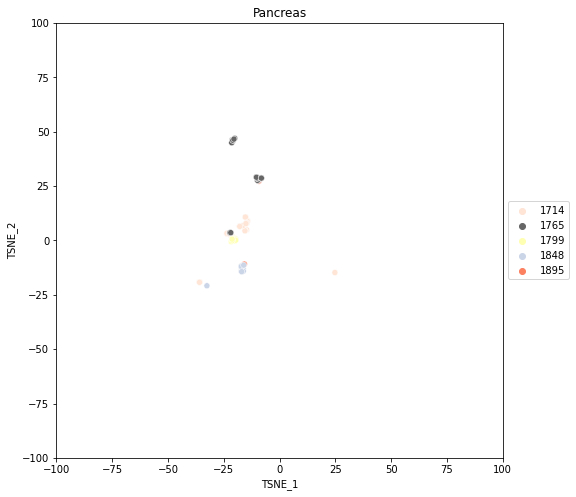

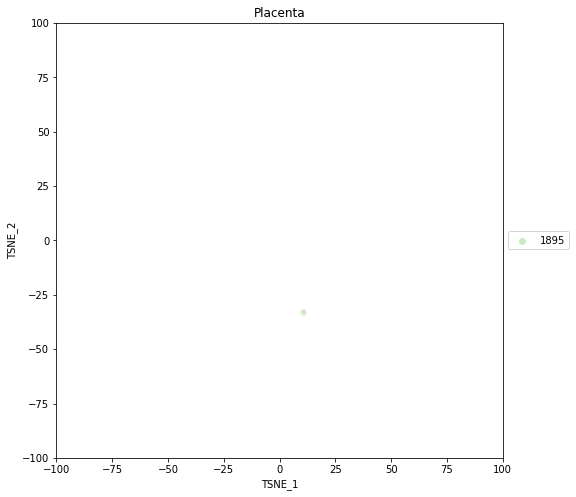

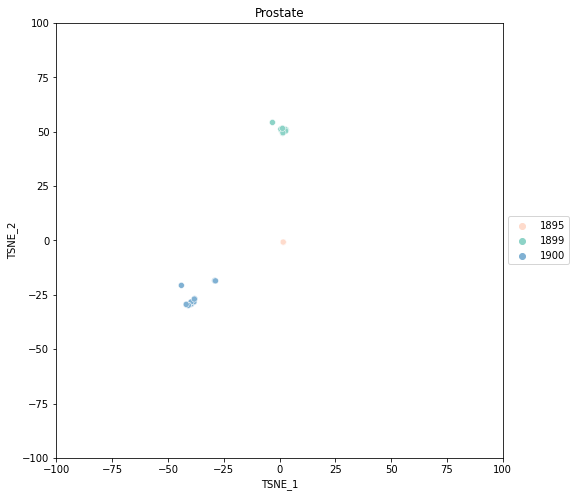

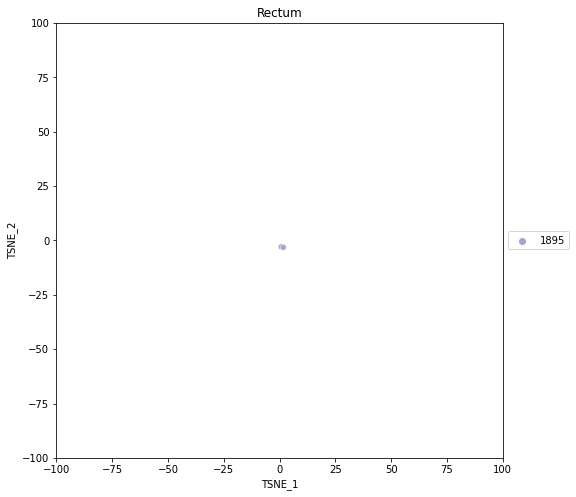

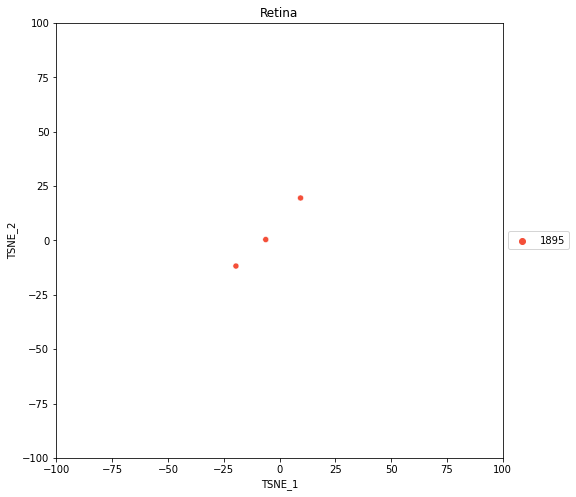

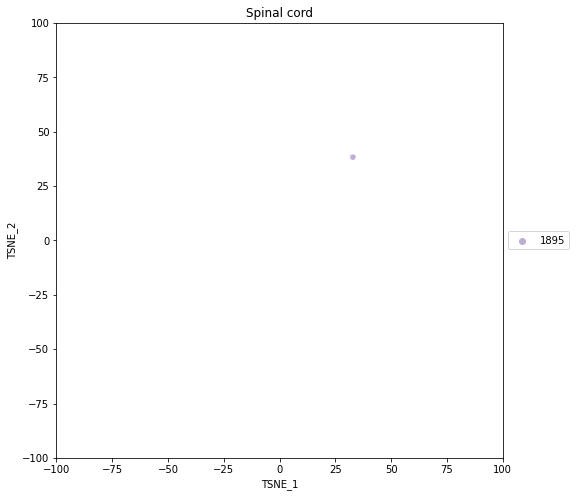

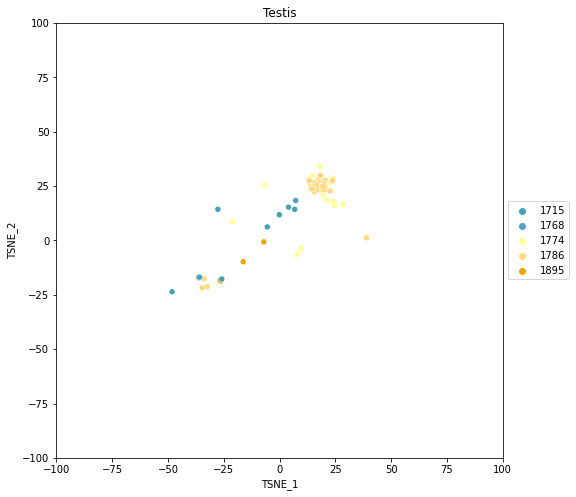

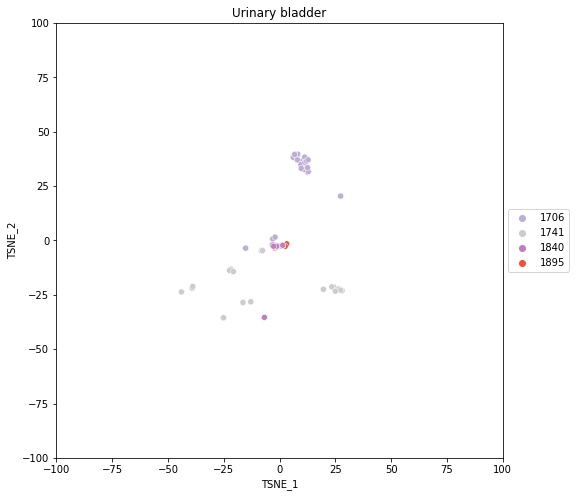

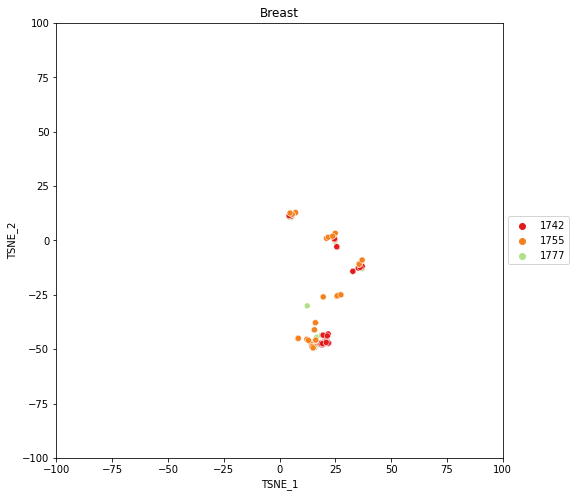

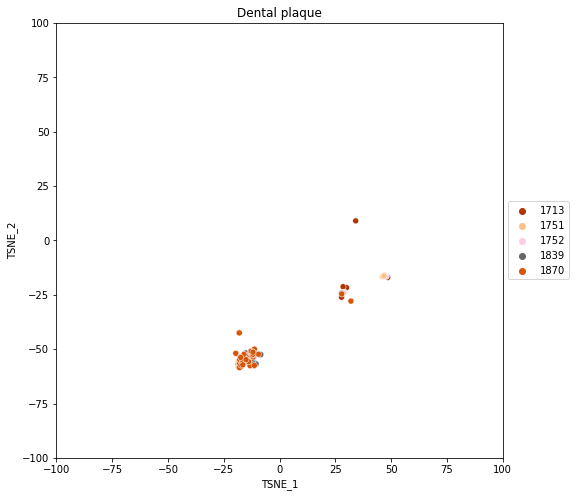

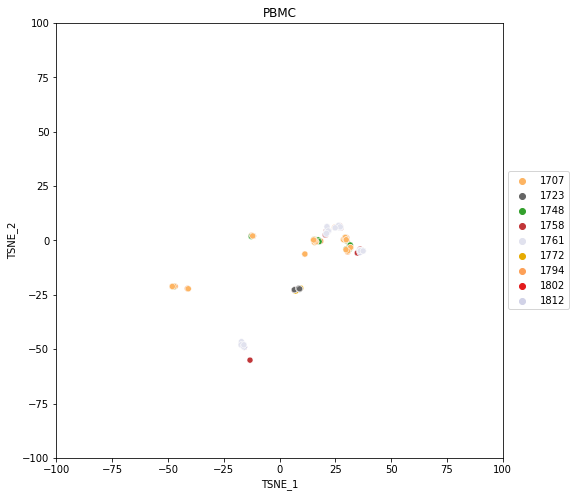

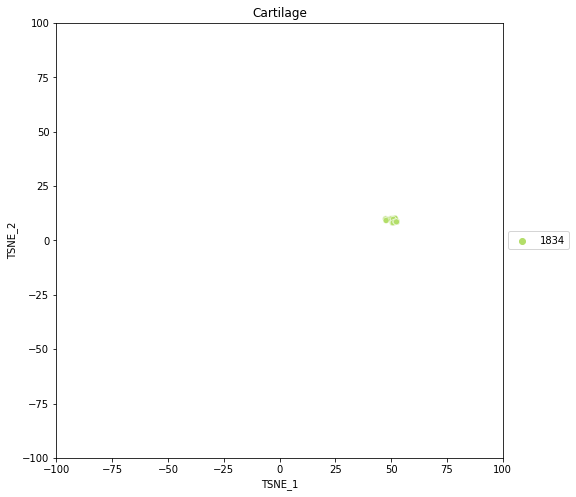

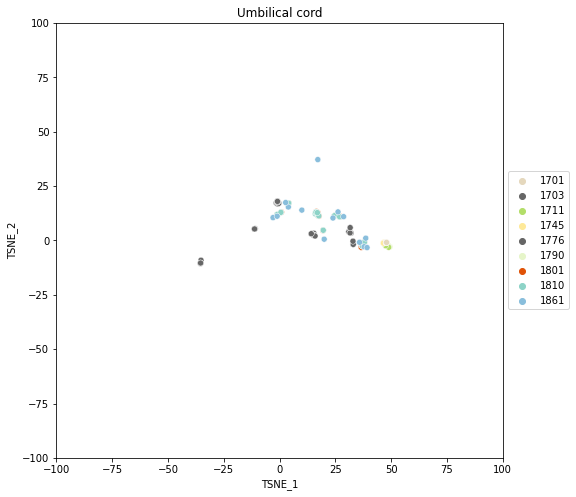

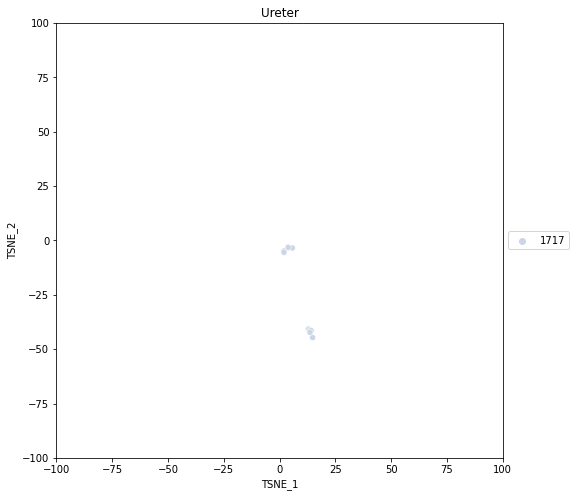

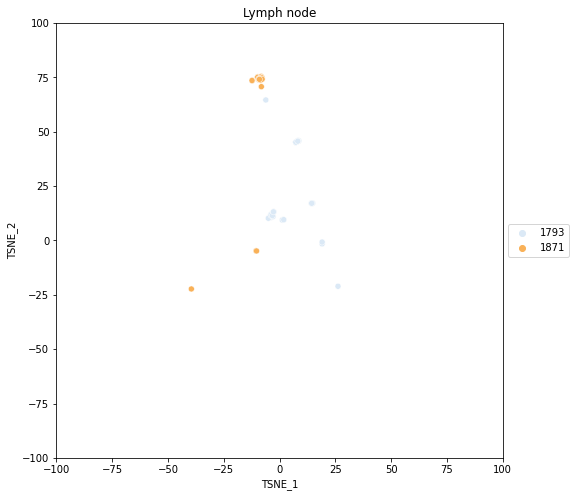

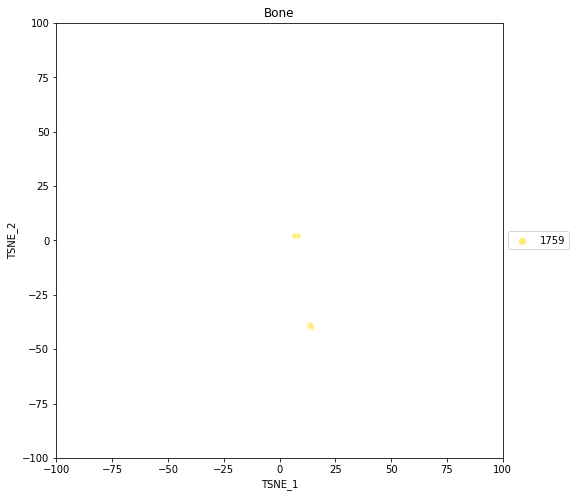

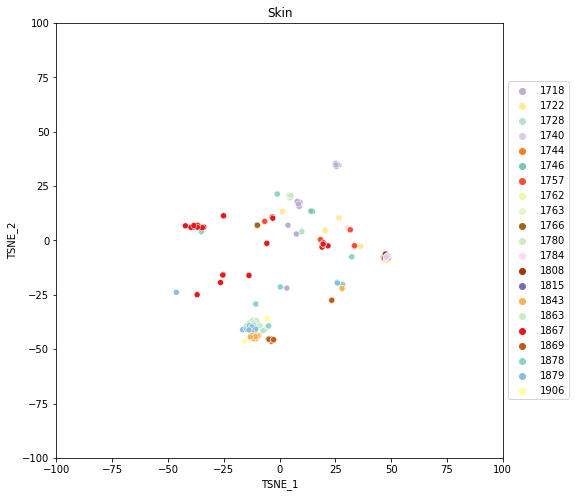

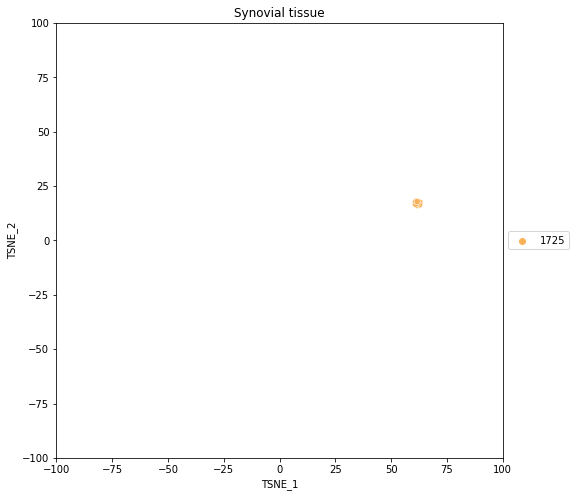

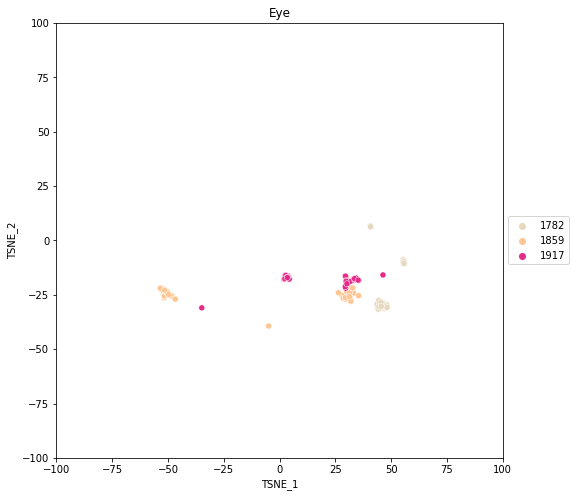

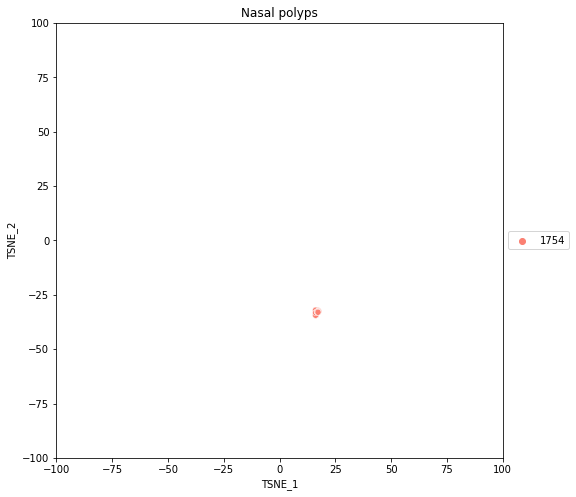

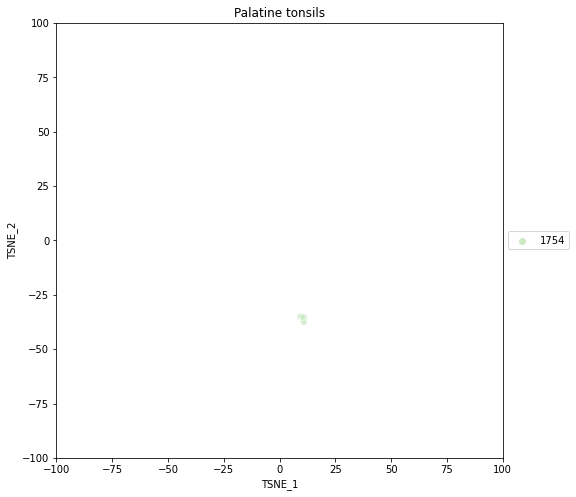

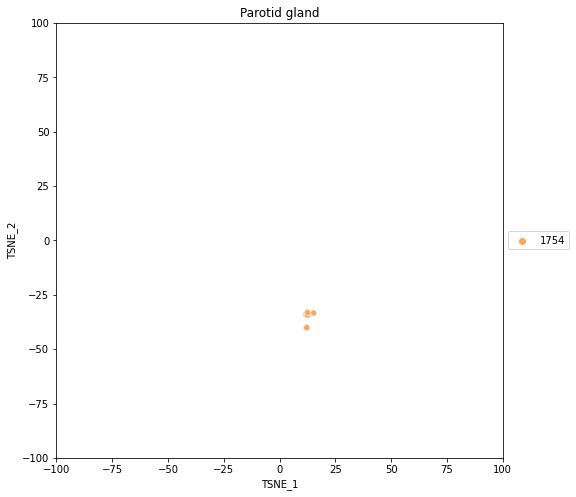

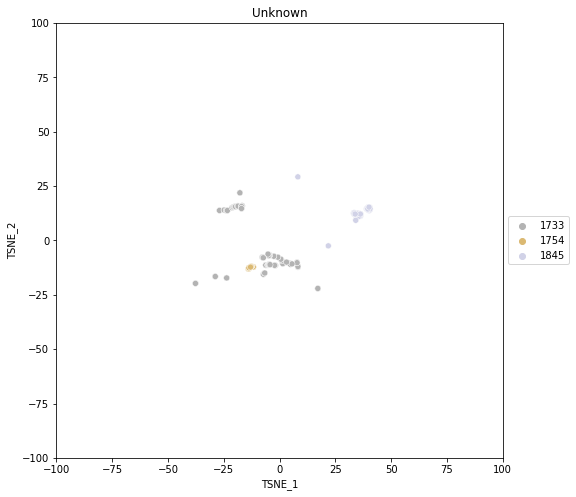

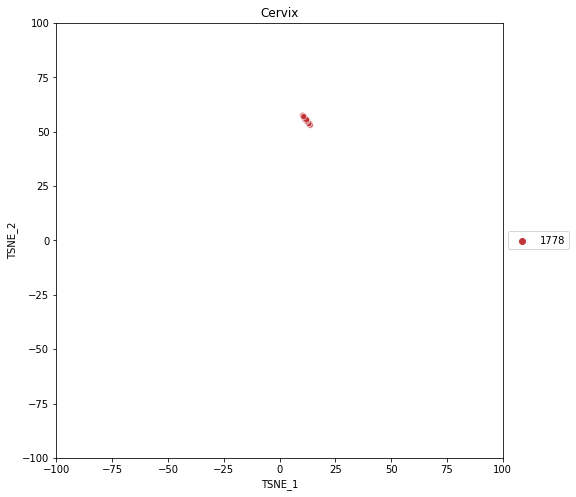

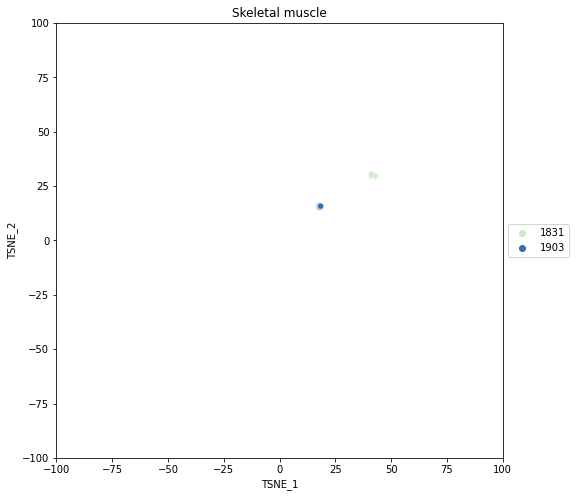

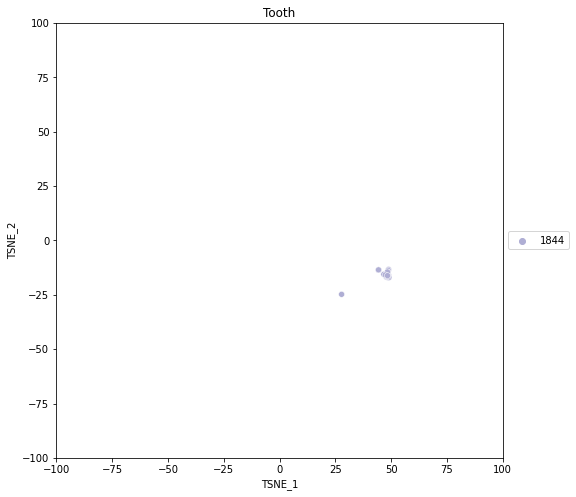

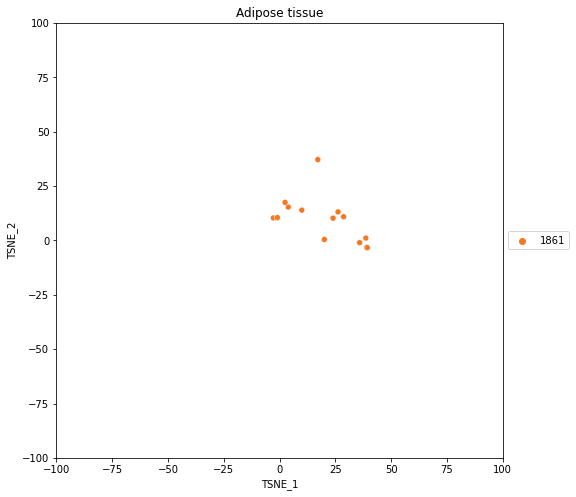

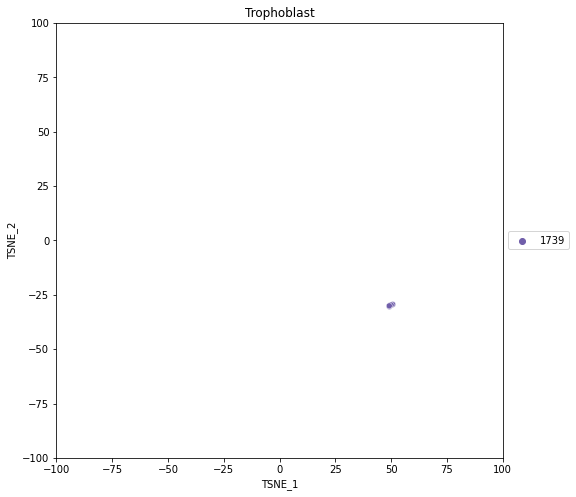

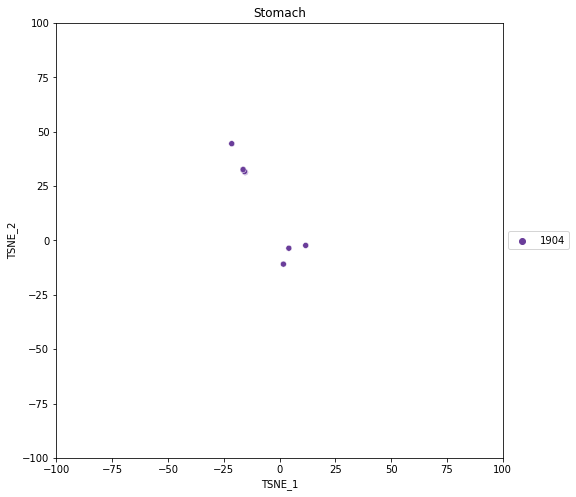

In [28]:
import random
for tissue in finalDf['tissue_name'].unique().tolist():
    finalDf_onetissue = finalDf.loc[finalDf['tissue_name'] == tissue]
    count = len(finalDf_onetissue['project_id'].unique())
    fig, ax=plt.subplots(figsize=(8,8))
    pal = sns.color_palette("Spectral", n_colors=count)
    g = sns.scatterplot(data=finalDf_onetissue, x='TSNE_1', y='TSNE_2', hue='project_id',palette=random.sample(project_colors, count), ax=ax)    
    ax.set_xlim(-100,100)
    ax.set_ylim(-100,100)

    g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    g.set_title(tissue)
    
    if tissue == 'fallopian tube/oviduct':
        tissue = 'Oviduct'
    g.figure.savefig('TSNE_scatterplots/{} TSNE_assay_c.png'.format(tissue))

Clustering between projects and between tissues

In [ ]:
atlas = pd.read_csv('tsne_atlas.csv')

In [ ]:
atlas.head()

In [ ]:
tissues = atlas.pop('tissue_name')
projects = atlas.pop('project_id')
values = atlas

In [ ]:
perplexity_list = [25, 30, 35, 40, 45, 50, 60, 80, 100]
for per in perplexity_list:
    plt.figure()
    tsne = TSNE(n_components=2, perplexity=per)
    principalComponents = tsne.fit_transform(values)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['TSNE_1', 'TSNE_2'])
    finalDf = pd.concat([principalDf, tissues, projects], axis = 1)
    fig, ax=plt.subplots(figsize=(10,20))
    g = sns.scatterplot(data=finalDf, x='TSNE_1', y='TSNE_2', hue='tissue_name', palette=tissue_colors[:-1])
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()